In [1]:
import numpy as np
import pickle
from operator import itemgetter
import numpy as np
from matplotlib.pyplot import *

In [2]:
user_idd_list = pickle.load(open('./user_idd_list.pkl'))
item_idd_list = pickle.load(open('./item_idd_list.pkl'))
key_genre = pickle.load(open('./key_genre.pkl'))
item_idd_genre_list = pickle.load(open('./item_idd_genre_list.pkl'))
item_idd_list = pickle.load(open('./item_idd_list.pkl'))
item_genre_dict = pickle.load(open('./item_genre_dict.pkl'))
item_id_dict = pickle.load(open('./item_id_dict.pkl'))
key_genre_rating_count = pickle.load(open('./key_genre_rating_count.pkl'))
rdf = pickle.load(open('./training_df.pkl'))
user_id_dict = pickle.load(open('./user_id_dict.pkl'))
key_genre_rating = pickle.load(open('./key_genre_rating.pkl'))


mean:
Horror:3.209360022790495
Sci-Fi:3.341459173083865
Comedy:3.3875737235440377
Thriller:3.449282840317668
Animation:3.5594403273056208
Documentary:3.7503587760264643

std:
Documentary:0.9899001630710854
Animation:1.0116959133898897
Thriller:1.0290800731435075
Comedy:1.0671511604552784
Sci-Fi:1.0893280650324246
Horror:1.1372617237447626

std of rating mean: 0.1711616102336483
std of each rating level: [0.00321238 0.01427599 0.00432679 0.02508975 0.00846576 0.03106606
 0.00875058 0.02879185 0.021822   0.02162507]
sum of std list: 0.16742623031447623


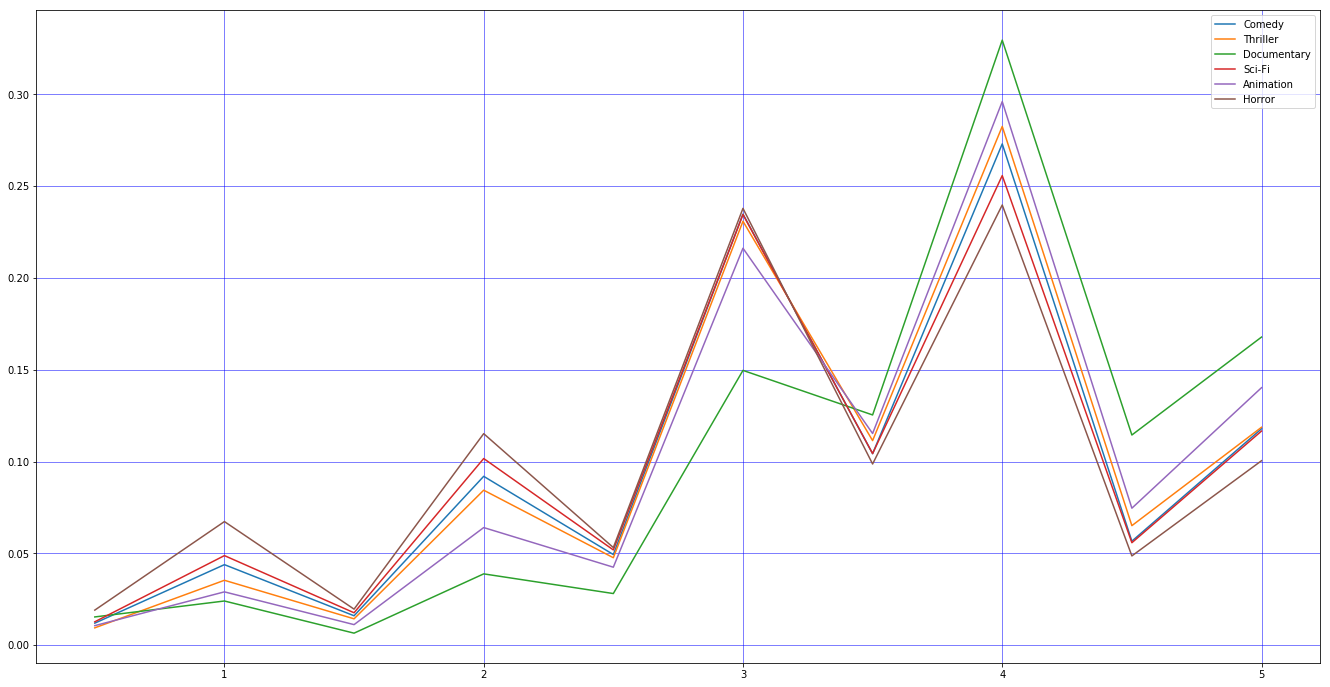

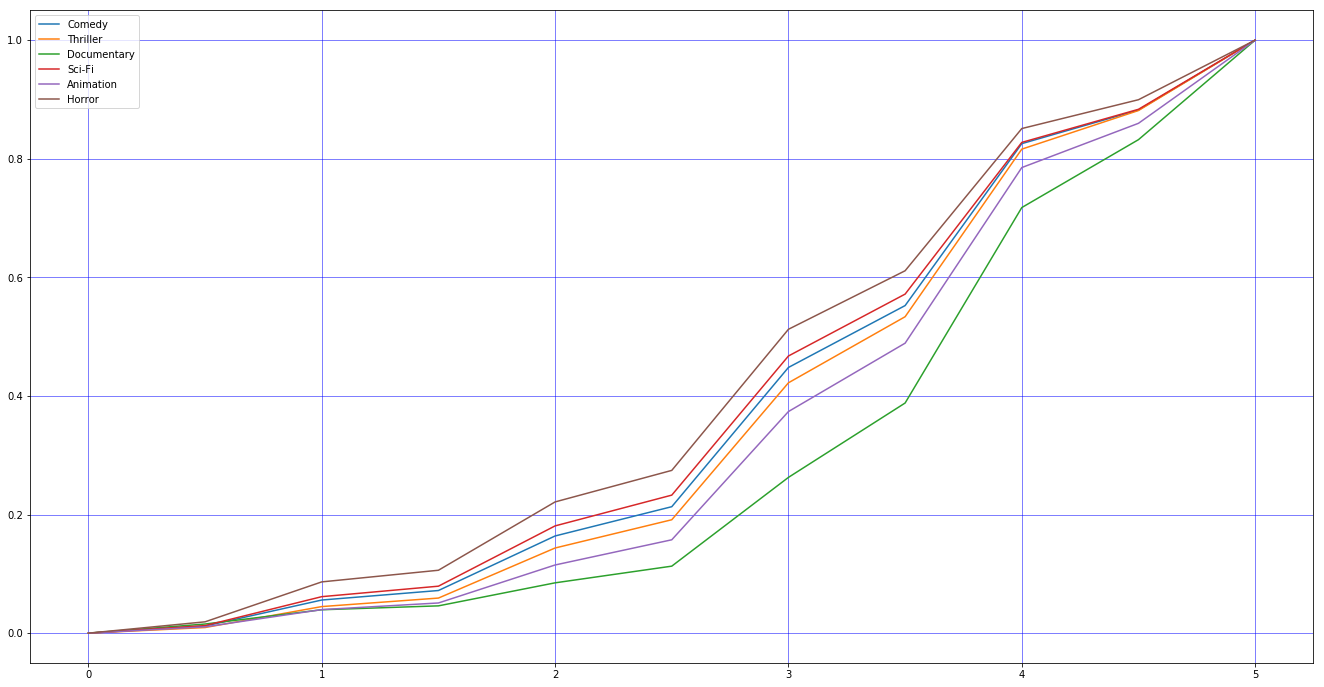

In [3]:
# calculate the weighted average of rating for each genre, and plot rating distribution
from dit.divergences import jensen_shannon_divergence

mean_list = list()
std_list = list()
rating_array = np.array([])
for k in key_genre:
    rl = key_genre_rating_count[k]
    rl = (rl * 1.0) / np.sum(rl)
    rating_array = np.append(rating_array, rl)
    mean = np.mean(key_genre_rating[k])
    std = np.std(key_genre_rating[k])
    mean_list.append([k, mean])
    std_list.append([k, std])
    plot(np.arange(0.5, 5.5, 0.5), rl)
legend(key_genre)
gcf().set_size_inches(23,12)
grid(color='b', linestyle='-', linewidth=0.5)
rating_array = rating_array.reshape((len(key_genre), 10))

print('')
print('=' * 100)
print('mean:')
mean_list = sorted(mean_list, key=itemgetter(1))
for mean_pair in mean_list:
    print(mean_pair[0] + ':' + str(mean_pair[1]))
print('')
print('std:')
std_list = sorted(std_list, key=itemgetter(1))
for std_pair in std_list:
    print(std_pair[0] + ':' + str(std_pair[1]))
print('')
print('std of rating mean: ' + str(np.std([i[1] for i in mean_list])))

std_list = np.std(rating_array, axis=0)
print('std of each rating level: ' + str(std_list))
print('sum of std list: ' + str(np.sum(std_list)))

# calculate and plot the CDF of each genre
figure()
cdf_array = np.array([])
for k in key_genre:
    rl = np.zeros(1 + len(key_genre_rating_count[k]))
    rl[1:] = key_genre_rating_count[k]
    rl = (rl * 1.0) / np.sum(rl)
    csum = np.cumsum(rl)
    cdf_array = np.append(cdf_array, csum)
    plot(np.arange(0, 5.5, 0.5), csum)
legend(key_genre)
gcf().set_size_inches(23,12)
grid(color='b', linestyle='-', linewidth=0.5)

In [4]:
from scipy.stats import entropy
def JS(distributions):
    num = distributions.shape[0]
    mean = np.mean(distributions, axis=0)
    js = 0.0
    for i in range(num):
        p = distributions[i, :]
        p /= p.sum()
        js += entropy(p, mean)
    js /= num
    return js

In [5]:
from scipy.stats import entropy
print('Average Divergence')
KL_list = list()
num_genre = len(key_genre)
for i in range(num_genre):
    for j in range(num_genre):
        if i == j:
            continue
        KL = entropy(rating_array[i, :], rating_array[j, :])
        KL_list.append(KL)
np.mean(KL_list)

Average Divergence


0.043319161332806326

In [6]:
# (u'Drama', 2393),
#  (u'Thriller', 1666),
#  (u'Comedy', 1484),
#  (u'Romance', 921),
#  (u'Horror', 800),
#  (u'Family', 392),
#  (u'Biography', 298),
#  (u'Animation', 225)

In [7]:
print('Jensen-Shannon Divergence')
JS(rating_array)

Jensen-Shannon Divergence


0.017653699727487485

In [8]:
genre_mean_dict = dict()
for k in key_genre:
    genre_mean_dict[k] = 0.0
for mean_pair in mean_list:
    genre_mean_dict[mean_pair[0]] = mean_pair[1]
with open("genre_mean_dict.pkl", "wb") as f:
    pickle.dump(genre_mean_dict, f, pickle.HIGHEST_PROTOCOL)